# Отчет по предмету "Численные методы"
## "Методы решения задач линейной алгебры" 1
**Студент:** Свистельников Илья Вадимович



**ЗАДАНИЕ 1.1**

Реализовать алгоритм LU -  разложения матриц (с выбором главного элемента) в виде программы. Используя разработанное программное обеспечение, решить систему линейных алгебраических уравнений (СЛАУ). Для матрицы СЛАУ вычислить определитель и обратную матрицу.

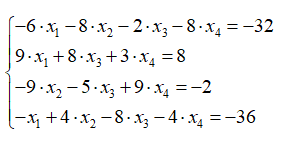

In [ ]:
import numpy as np

A = np.array([[-6, -8, -2, -8], [9, 0, 8, 3], [0, -9, -5, 9], [-1, 4, -8, -4]])
b = np.array([[-32, 8, -2, -36]]).transpose()
n=4
#Ax=b

In [ ]:
def lu_decomposition(A):
    L = np.zeros([4,4])
    U = np.zeros([4,4])

    for i in range(n):
        for j in range(i, n):
            U[i][j] = A[i][j] - sum(L[i][k]*U[k][j] for k in range(i))
        for j in range(i, n):
            if i == j:
                L[i][i] = 1
            else:
                L[j][i] = (A[j][i] - sum(L[j][k]*U[k][i] for k in range(i))) / U[i][i]

    return L, U

In [ ]:
L, U = lu_decomposition(A)
print(L)
print(U)
print(L@U)

[[ 1.          0.          0.          0.        ]
 [-1.5         1.          0.          0.        ]
 [-0.          0.75        1.          0.        ]
 [ 0.16666667 -0.44444444  0.62222222  1.        ]]
[[ -6.          -8.          -2.          -8.        ]
 [  0.         -12.           5.          -9.        ]
 [  0.           0.          -8.75        15.75      ]
 [  0.           0.           0.         -16.46666667]]
[[-6. -8. -2. -8.]
 [ 9.  0.  8.  3.]
 [ 0. -9. -5.  9.]
 [-1.  4. -8. -4.]]


In [ ]:
def z_calculate(b, L):
  z = np.zeros(n)
  z[0] = b[0]
  for i in range(1, n):
    z[i] = b[i] - sum(L[i][j]*z[j] for j in range(i))

  return z

In [ ]:
z = z_calculate(b, L)
z

<ipython-input-4-cd845087ba81>:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  z[0] = b[0]
<ipython-input-4-cd845087ba81>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  z[i] = b[i] - sum(L[i][j]*z[j] for j in range(i))


array([-32.        , -40.        ,  28.        , -65.86666667])

In [ ]:
x = np.zeros(n)
x[n-1] = z[n-1]/U[n-1][n-1]
for i in range(n-2, -1, -1):
  x[i] = (z[i] - sum(U[i][j]*x[j] for j in range(i, n)))/U[i][i]
x

array([-4.,  2.,  4.,  4.])

In [ ]:
A_inv = np.linalg.inv(U) @ np.linalg.inv(L)
det=1
for i in range(n):
  det*=U[i][i]
print(A_inv, '\n', det)

[[ 0.02660497  0.14189319  0.02853287  0.11740891]
 [-0.07142857 -0.04761905 -0.04761905  0.        ]
 [-0.00260266 -0.01388086 -0.04626952 -0.10931174]
 [-0.07287449 -0.05533063  0.03778677 -0.06072874]] 
 10374.000000000002


Проверка

In [ ]:
np.linalg.solve(A,b)

array([[-4.],
       [ 2.],
       [ 4.],
       [ 4.]])

In [ ]:
print(np.linalg.inv(A))
np.linalg.det(A)

[[ 0.02660497  0.14189319  0.02853287  0.11740891]
 [-0.07142857 -0.04761905 -0.04761905 -0.        ]
 [-0.00260266 -0.01388086 -0.04626952 -0.10931174]
 [-0.07287449 -0.05533063  0.03778677 -0.06072874]]


10374.00000000001

### Вывод по заданию 1.1

Был реализован метод LU-разложения с выбором главного элемента и метод поиска решения СЛАУ на его основе. В ходе
работы также посчитан определитель матрицы и её обратная матрица.


**ЗАДАНИЕ 1.2**

Реализовать метод прогонки в виде программы, задавая в качестве входных данных ненулевые элементы матрицы системы и
вектор правых частей. Используя разработанное программное обеспечение, решить СЛАУ с трехдиагональной матрицей.

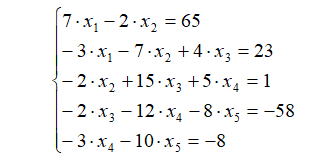

In [ ]:
import numpy as np
n=5
alpha = [0, -3, -2, -2, -3]
beta = [7, -7, 15, -12, -10]
charlie = [-2, 4, 5, -8, 0]
delta = [65, 23, 1, -58, -8]
P = np.zeros(n)
Q = np.zeros(n)
x = np.zeros(n)

P[0] = -charlie[0]/beta[0]
Q[0] = delta[0]/beta[0]
P[n-1]=0
for i in range(1, n-1):
    P[i] = -charlie[i]/(beta[i]+alpha[i]*P[i-1])
    Q[i] = (delta[i]-alpha[i]*Q[i-1])/(beta[i]+alpha[i]*P[i-1])

Q[n-1] = (delta[n-1]-alpha[n-1]*Q[n-2])/(beta[n-1]+alpha[n-1]*P[n-2])
x[n-1] = Q[n-1]
for i in range(n-2, -1, -1):
  x[i] = P[i]*x[i+1] + Q[i]

x

array([ 7., -8., -3.,  6., -1.])

Проверка

In [ ]:
A=np.matrix([
[7,-2,0,0,0],
[-3,-7,4,0,0],
[0,-2,15,5,0],
[0,0,-2,-12,-8],
[0,0,0,-3,-10]])
np.linalg.solve(A, delta)

array([ 7., -8., -3.,  6., -1.])

### Вывод по заданию 1.2

Был реализован метод прогонки и решена СЛАУ на его основе.



**ЗАДАНИЕ 1.3**

Реализовать метод простых итераций и метод Зейделя в виде программ, задавая в качестве входных данных матрицу системы,
вектор правых частей и точность вычислений. Используя разработанное программное обеспечение, решить СЛАУ.
Проанализировать количество итераций, необходимое для достижения заданной точности.

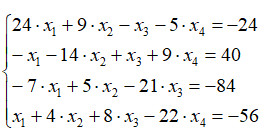

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
A = np.array([[24, 9, -1, -5], [-1, -14, 1, 9], [-7, 5, -21, 0], [1, 4, 8, -22]])
b = np.array([-24, 40, -84, -56])
eps = 1e-10

def simple_iterations(A, b, eps):
  n = len(A)
  x = np.zeros(n)
  x_prev = np.ones(n)
  iter = 0
  while np.linalg.norm(x - x_prev) > eps:
    x_prev = np.copy(x)
    for i in range(n):
      x[i] = b[i]
      for j in range(n):
        if j != i:
          x[i] -= A[i,j] * x_prev[j]
      x[i] /= A[i,i]
    iter+=1
  return x,iter


def seidel(A, b, eps):
  n = len(A)
  x = np.zeros(n)
  x_prev = np.ones(n)
  iter = 0
  while np.linalg.norm(x - x_prev) > eps:
    x_prev = np.copy(x)
    for i in range(n):
      sum1 = np.dot(A[i][:i], x[:i])
      sum2 = np.dot(A[i][i + 1:], x_prev[i + 1:])
      x[i] = (b[i] - sum1 - sum2) / A[i][i]

      if np.linalg.norm(x - x_prev) < eps:
        break
    iter+=1
  return x,iter

Метод простых итераций:
Решение: [ 1.75472969e-11 -4.96177068e-11  4.00000000e+00  4.00000000e+00], Итераций: 41


Text(0.5, 0, 'Итерации')

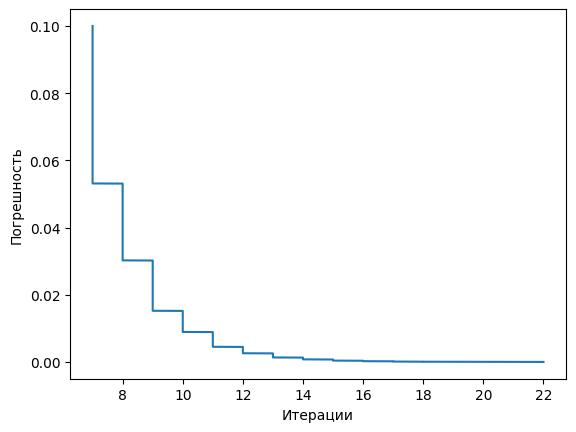

In [ ]:
x_simple, iterations_simple = simple_iterations(A, b, eps)
print("Метод простых итераций:")
print(f"Решение: {x_simple}, Итераций: {iterations_simple}")

ITER=[]
EPS=np.arange(10e-2,10e-24,-10e-6)
for eps in EPS:
  X,iterations = simple_iterations(A, b, eps)
  ITER.append(iterations)
plt.plot(ITER,EPS)
plt.ylabel("Погрешность")
plt.xlabel("Итерации")

Метод Зейделя:
Решение: [ 1.83008726e-06 -6.54327430e-06  3.99999628e+00  3.99999775e+00], Итераций: 12


Text(0.5, 0, 'Итерации')

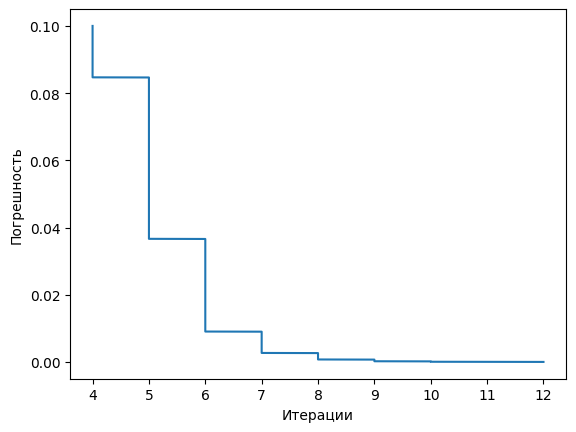

In [ ]:
x_seidel, iterations_seidel = seidel(A, b, eps)
print("Метод Зейделя:")
print(f"Решение: {x_seidel}, Итераций: {iterations_seidel}")

ITER=[]
EPS=np.arange(10e-2,10e-24,-10e-6)
for eps in EPS:
  X,iterations = seidel(A, b, eps)
  ITER.append(iterations)
plt.plot(ITER,EPS)
plt.ylabel("Погрешность")
plt.xlabel("Итерации")

Проверка

In [ ]:
np.linalg.solve(A,b)

array([ 4.85510375e-17, -2.28155924e-16,  4.00000000e+00,  4.00000000e+00])

### Вывод по заданию 1.3

Был реализован метод Гаусса-Зейделя и решена СЛАУ на его основе. Можно наблюдать прямую зависимость между точностью
как число знаков после запятой и количеством итераций



**ЗАДАНИЕ 1.4**

Реализовать метод вращений в виде программы, задавая в качестве входных данных матрицу и точность вычислений.
Используя разработанное программное обеспечение, найти собственные значения и собственные векторы симметрических
матриц. Проанализировать зависимость погрешности вычислений от числа итераций.

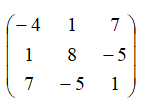

In [ ]:
import numpy as np
A = np.array([[-4, 1, 7], [1, 8, -5], [7, -5, 1]])
A

array([[-4,  1,  7],
       [ 1,  8, -5],
       [ 7, -5,  1]])

In [ ]:
import numpy as np

def jacobi_rotation(A, eps):
  n = len(A)
  eigenvectors = np.eye(n)
  iterations = 0

  while True:
    max_off_diag = 0
    p = 0
    q = 0
    for i in range(n):
      for j in range(i + 1, n):
        if abs(A[i][j]) > max_off_diag:
          max_off_diag = abs(A[i][j])
          p = i
          q = j
    if max_off_diag < eps:
      break
    if A[p][p] == A[q][q]:
      theta = np.pi / 4
    else:
      theta = 0.5 * np.arctan(2 * A[p][q] / (A[p][p] - A[q][q]))
    c = np.cos(theta)
    s = np.sin(theta)

    R = np.eye(n)
    R[p][p] = c
    R[p][q] = -s
    R[q][p] = s
    R[q][q] = c

    A = np.dot(np.dot(np.transpose(R), A), R)
    eigenvectors = np.dot(eigenvectors, R)
    iterations += 1

  eigenvalues = [A[i][i] for i in range(n)]

  return eigenvalues, eigenvectors, iterations


In [ ]:
val, vec, iter = jacobi_rotation(A, 1e-6)
print(val)
print(vec)
print("\nКоличество итераций =", iter)

[-9.739539677555143, 11.07883656210681, 3.660703115448333]
[[ 0.7702616  -0.19761834  0.60633659]
 [-0.21285995  0.81658171  0.53654912]
 [-0.60115532 -0.54234796  0.5869165 ]]

Количество итераций = 7


Text(0.5, 0, 'Итерации')

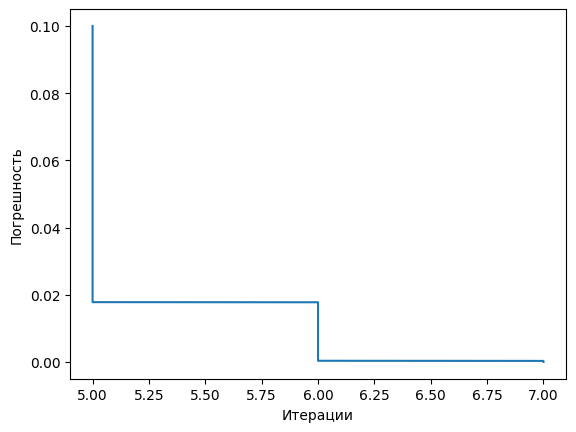

In [ ]:
import matplotlib.pyplot as plt

ITER=[]
EPS=np.arange(10e-2,10e-24,-10e-6)
for eps in EPS:
  val, vec, iter = jacobi_rotation(A, eps)
  ITER.append(iter)
plt.plot(ITER,EPS)
plt.ylabel("Погрешность")
plt.xlabel("Итерации")

### Вывод по заданию 1.4

Был реализован метод вращений и найдены собственные вектора и значения соответственно. На графике отображена
зависимость между погрешностью и числом итераций.


**ЗАДАНИЕ 1.5**

Реализовать алгоритм QR – разложения матриц в виде программы. На его основе разработать программу, реализующую QR –
алгоритм решения полной проблемы собственных значений произвольных матриц, задавая в качестве входных данных матрицу
и точность вычислений. С использованием разработанного программного обеспечения найти собственные значения матрицы.

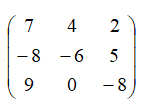

In [ ]:
import numpy as np
A = np.array([[7, 4, 2], [-8, -6, 5], [9, 0, -8]], dtype=float)

In [ ]:
def qr_decomposition(A):
  m, n = A.shape
  Q = np.eye(m)
  R = np.copy(A)
  for j in range(n):
      x = R[j:, j]
      norm_x = np.linalg.norm(x)
      if x[0] < 0:
        norm_x *= -1
      v = np.concatenate([[x[0] + norm_x], x[1:]])
      v /= np.linalg.norm(v)

      R[j:, j:] -= 2 * np.outer(v, np.dot(v, R[j:, j:]))
      Q[j:, :] -= 2 * np.outer(v, np.dot(v, Q[j:, :]))

  return Q, R

In [ ]:
def eigenvalues_qr(A, eps=1e-6, max_iter=1000):
  n = len(A)
  eigenvalues = np.zeros(n)
  for i in range(max_iter):
    Q, R = qr_decomposition(A)
    A = np.dot(R, Q)
    if np.allclose(np.tril(A, -1), np.zeros_like(A), eps):
      break
  eigenvalues = np.diag(A)

  return eigenvalues

In [ ]:
val = eigenvalues_qr(A)
val

array([10.34316286,  9.59197285,  3.70925349])

### Вывод по заданию 1.5

Был реализован алгоритм QR-разложения, на основе которого найдены собственные значения.

